<a href="https://colab.research.google.com/github/Um9503/Python-Projects/blob/main/Major_Project_AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Introduction:***

*Airbnb, is an American San Francisco-based company operating an online marketplace for short-term homestays and experiences. The company acts as a broker and charges a commission from each booking.*

*The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.*

*The company is credited with revolutionizing the tourism industry however it has also been the subject of intense criticism by residents of tourism hotspot cities like Barcelona, Venice, etc. for enabling an unaffordable increase in home rents, and for a lack of regulation.*

*Since its founding in 2008, Airbnb has become one of the most successful and valuable start-ups in the world, and has had a significant impact on the industry of renting homes and the hospitality industry more generally.*

***We have data on 74111 Airbnb properties across the nation. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a newly listed property on Airbnb.***

# ***Data:***
***Given below is the data used to build linear regressiom models and predicting the strategic pricing of aproperty on AirBNB;***

***Data Description:***

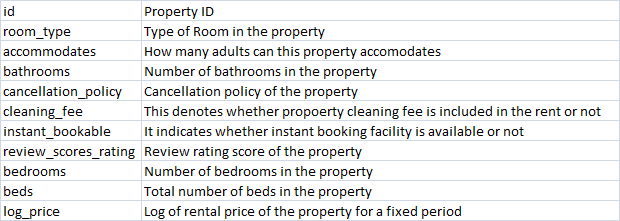


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/AirBNB-1.csv")
df.head(74111)


<ipython-input-12-ea10be4fe47e>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/AirBNB-1.csv")


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [ ]:
df.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

*There are missing values in "id", "instant_booking" and "log_price". Let's check if there are any duplicate values*

In [ ]:
df.nunique()


id                      74111
room_type                   3
accommodates               16
bathrooms                  17
cancellation_policy         3
cleaning_fee                2
instant_bookable            2
review_scores_rating       54
bedrooms                   11
beds                       18
log_price                 767
dtype: int64

*There are no duplicate values*

In [ ]:
df.describe()


,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
59601,13567393,Entire home/apt,3.0,2.0,flexible,False,f,NaN,2.0,1.0,4.248495
43446,17640554,Entire home/apt,4.0,1.0,strict,True,t,88.0,0.0,1.0,4.499810
7997,600295,Entire home/apt,4.0,1.0,strict,True,f,100.0,2.0,2.0,5.298317
17414,6079197,Private room,1.0,1.0,moderate,True,f,100.0,1.0,1.0,3.433987
3957,1180537,Entire home/apt,8.0,2.0,strict,True,f,99.0,4.0,4.0,5.988961
6033,19504042,Entire home/apt,2.0,1.5,moderate,True,f,100.0,1.0,1.0,4.787492
29784,4802374,Private room,2.0,1.0,strict,True,f,100.0,1.0,1.0,4.442651
19117,349841,Entire home/apt,3.0,1.0,flexible,True,f,NaN,1.0,1.0,5.141664
23723,6741968,Private room,2.0,1.0,flexible,True,t,NaN,1.0,1.0,4.077537
35746,6115291,Private room,2.0,2.0,moderate,True,f,97.0,1.0,1.0,4.442651


In [ ]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].min())
series = pd.isnull(df["review_scores_rating"])
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].min())
df[series]

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price


In [ ]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())
df['accommodates'] = df['accommodates'].fillna(df['accommodates'].median())
df['accommodates'] = df['accommodates'].fillna(df['accommodates'].median())
df.sample(n=10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
41874,4395384,Private room,2.0,1.0,strict,False,f,100.0,1.0,1.0,4.007333
2342,2105487,Entire home/apt,4.0,2.0,strict,True,f,86.0,2.0,2.0,5.241747
21809,9040214,Entire home/apt,8.0,4.0,moderate,True,f,100.0,4.0,5.0,5.521461
37956,7559867,Entire home/apt,6.0,1.0,flexible,True,f,92.0,3.0,3.0,5.298317
53994,10469455,Private room,2.0,1.0,strict,False,f,90.0,4.0,4.0,3.850148
10647,8054651,Private room,1.0,1.5,flexible,False,f,100.0,1.0,1.0,3.912023
66134,19252113,Private room,1.0,1.0,moderate,True,f,97.0,1.0,1.0,4.553877
15207,14821542,Entire home/apt,4.0,1.0,flexible,False,f,20.0,2.0,2.0,5.298317
62184,12930677,Entire home/apt,3.0,1.0,moderate,True,t,84.0,1.0,2.0,4.787492
35808,9391509,Entire home/apt,4.0,2.0,strict,True,f,93.0,2.0,2.0,5.298317


### ***Correlation Matrix:***

<Axes: >

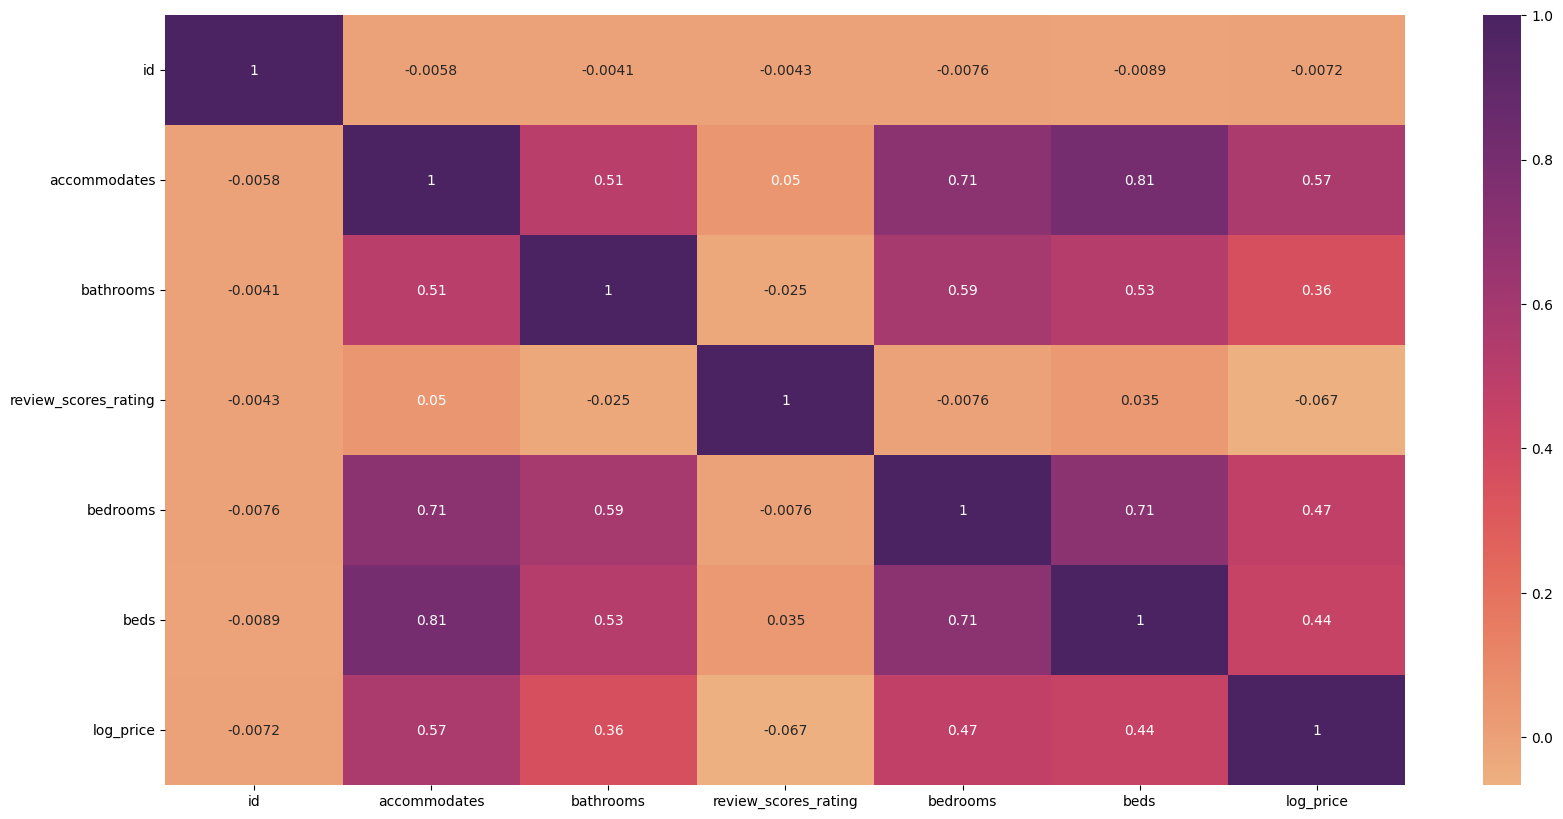

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='flare')

In [ ]:
def correlation(dataset,threshold):

    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
    col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(df,0.7)
len(set(corr_features))
corr_features

{'beds'}

# ***Basic EDA:***

In [ ]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize)
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='pink')
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="deep") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')
    sns.color_palette("flare", as_cmap=True)

In [ ]:
def perc_on_bar(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

    plt.show()

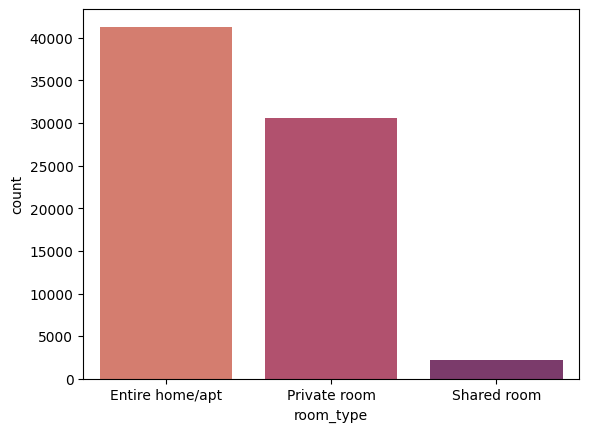

In [ ]:
a=sns.countplot(x='room_type',data=df,palette='flare')
plt.show()

<ipython-input-109-f23518910342>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="deep") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)


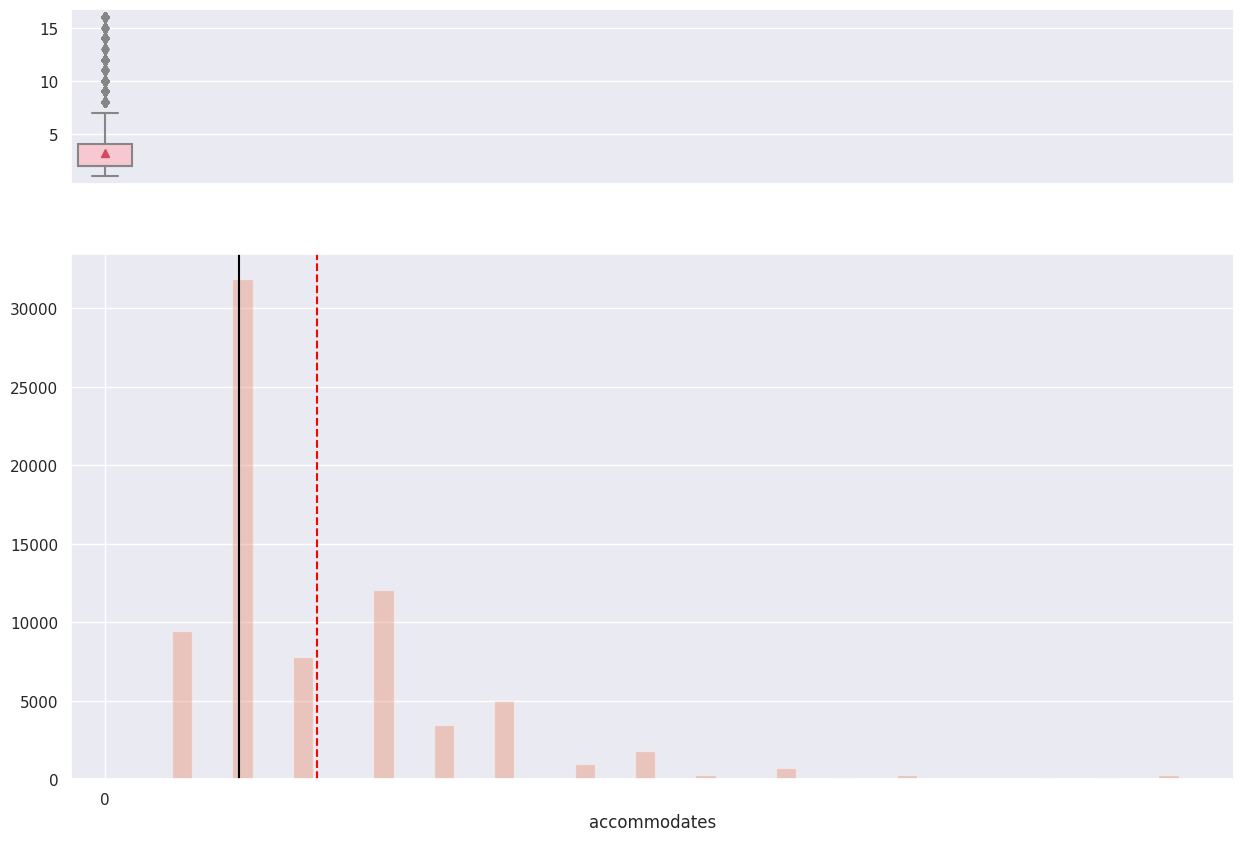

In [ ]:
df2=df.drop(['room_type'],axis=1,inplace=False)
histogram_boxplot(df['accommodates'])

<ipython-input-106-b39563e9327c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="pastel") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)


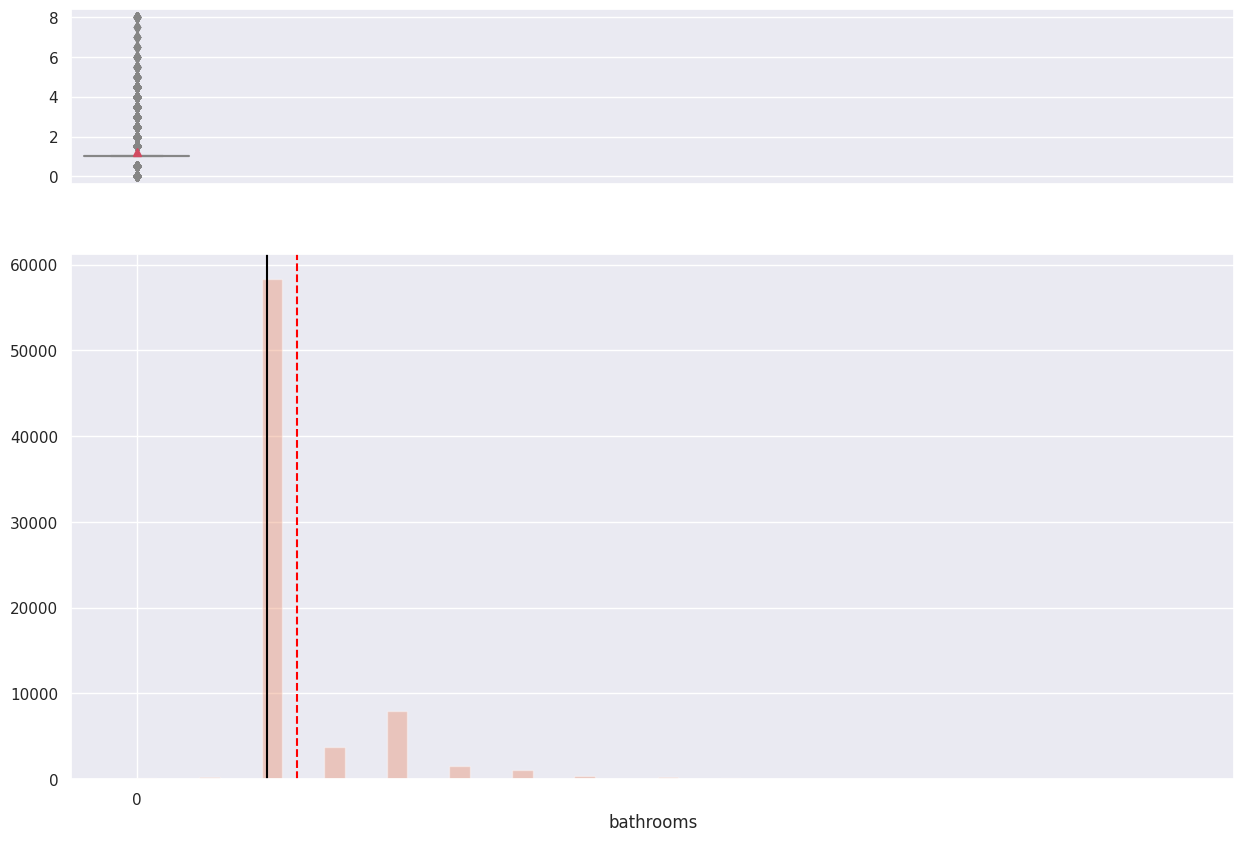

In [ ]:
histogram_boxplot(df['bathrooms'])

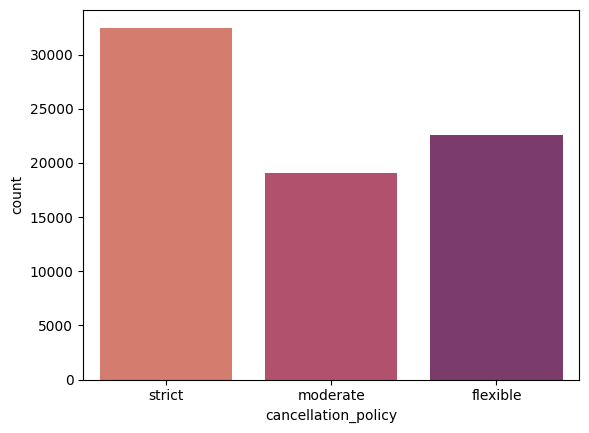

In [ ]:
a=sns.countplot(x='cancellation_policy',data=df, palette='flare')
plt.show()

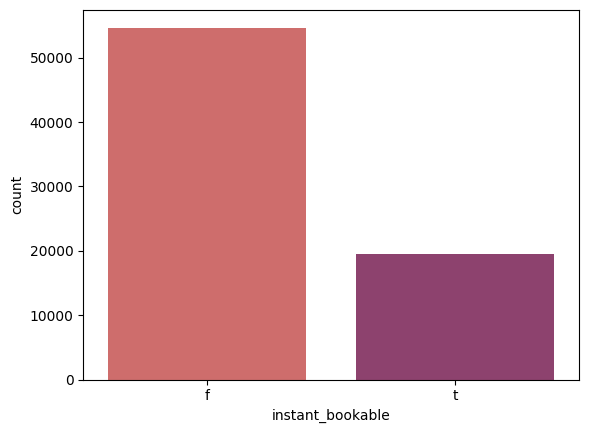

In [ ]:
a=sns.countplot(x='instant_bookable',data=df, palette='flare')
plt.show()

<ipython-input-109-f23518910342>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="deep") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)


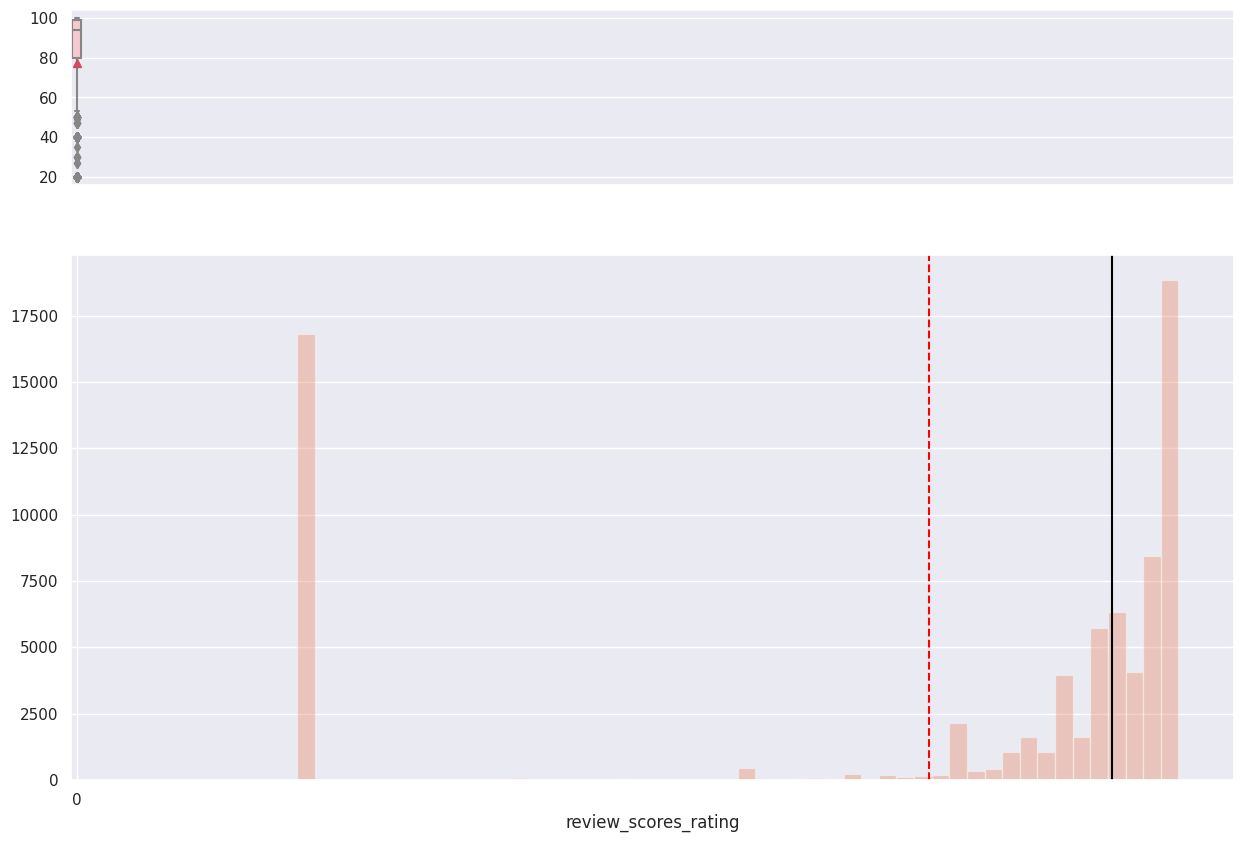

In [ ]:
histogram_boxplot(df['review_scores_rating'])

<ipython-input-109-f23518910342>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="deep") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)


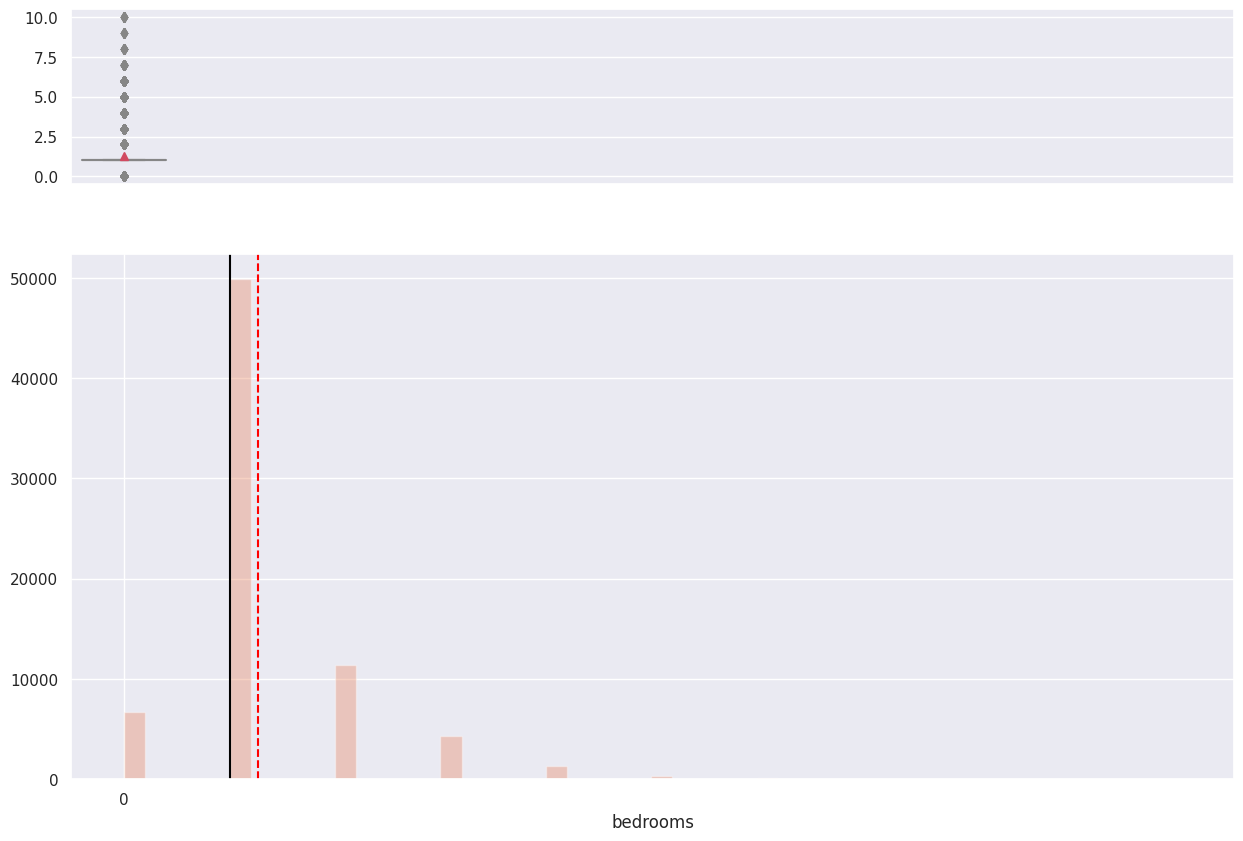

In [ ]:
histogram_boxplot(df['bedrooms'])

<ipython-input-109-f23518910342>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="deep") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)


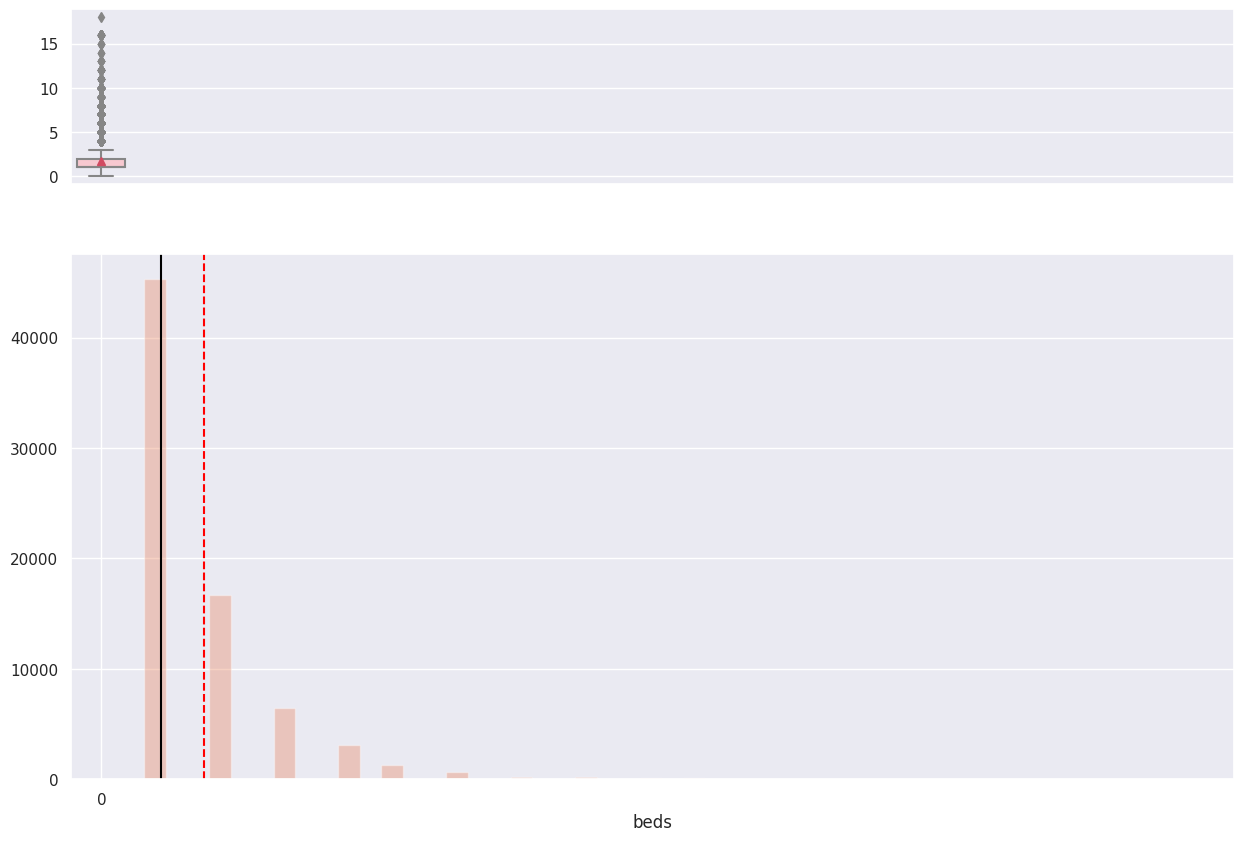

In [ ]:
histogram_boxplot(df['beds'])

<ipython-input-109-f23518910342>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="deep") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)


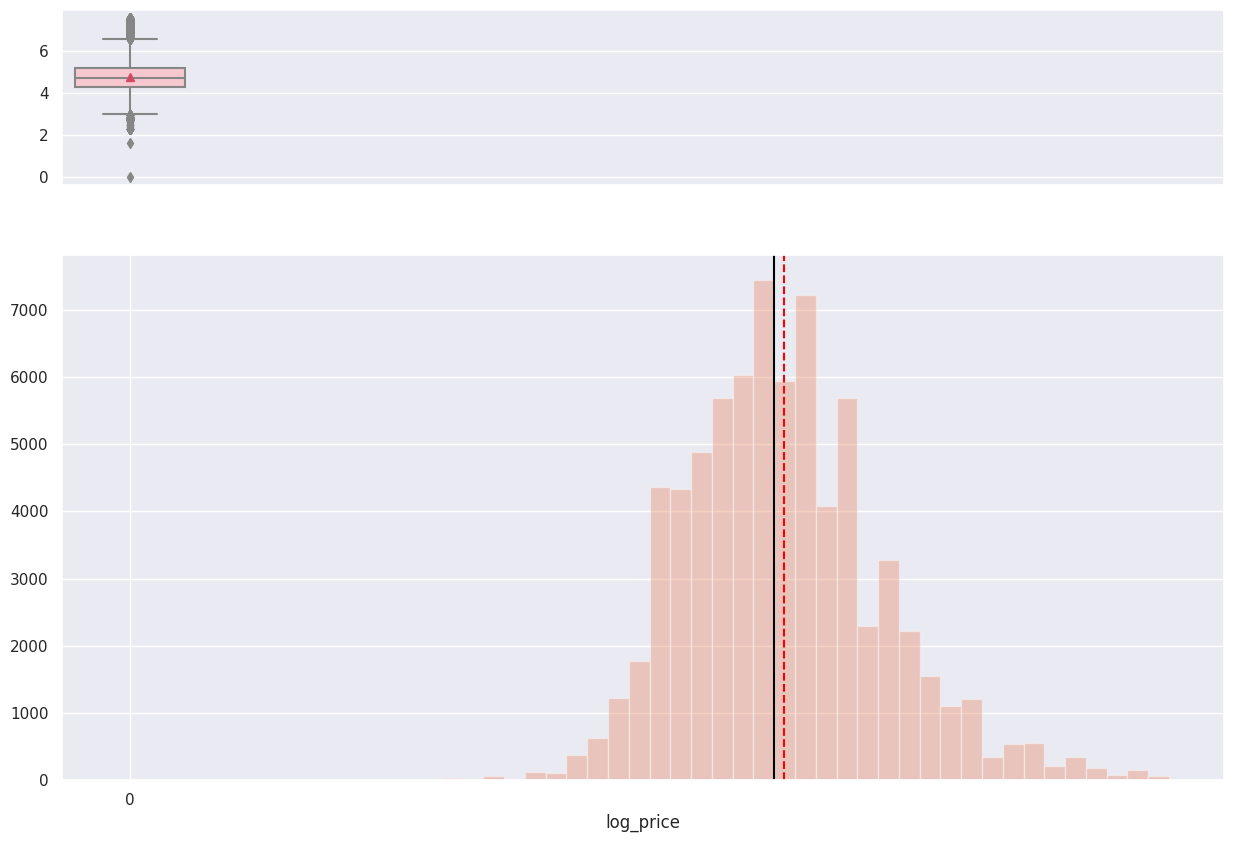

In [ ]:
histogram_boxplot(df['log_price'])

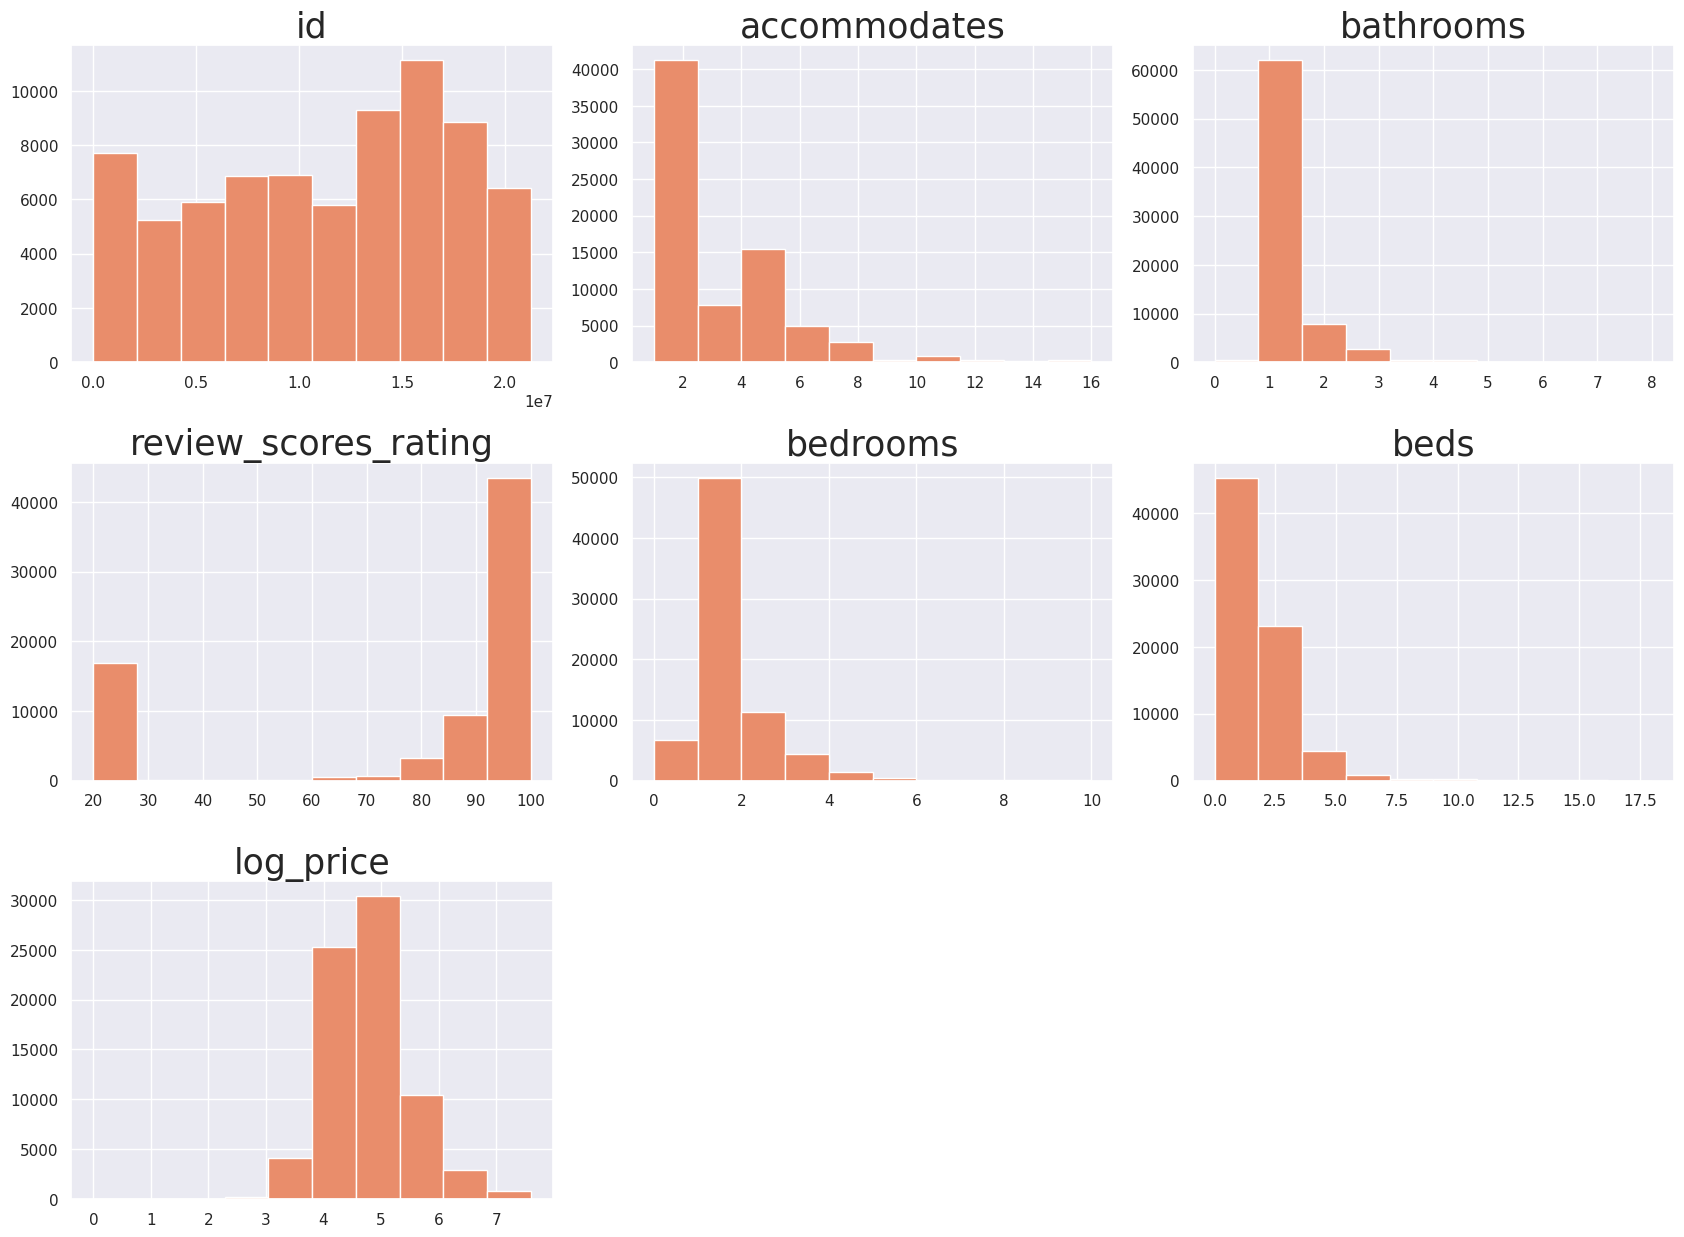

In [ ]:
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
sns.color_palette("flare", as_cmap=True)

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25,)


plt.show()

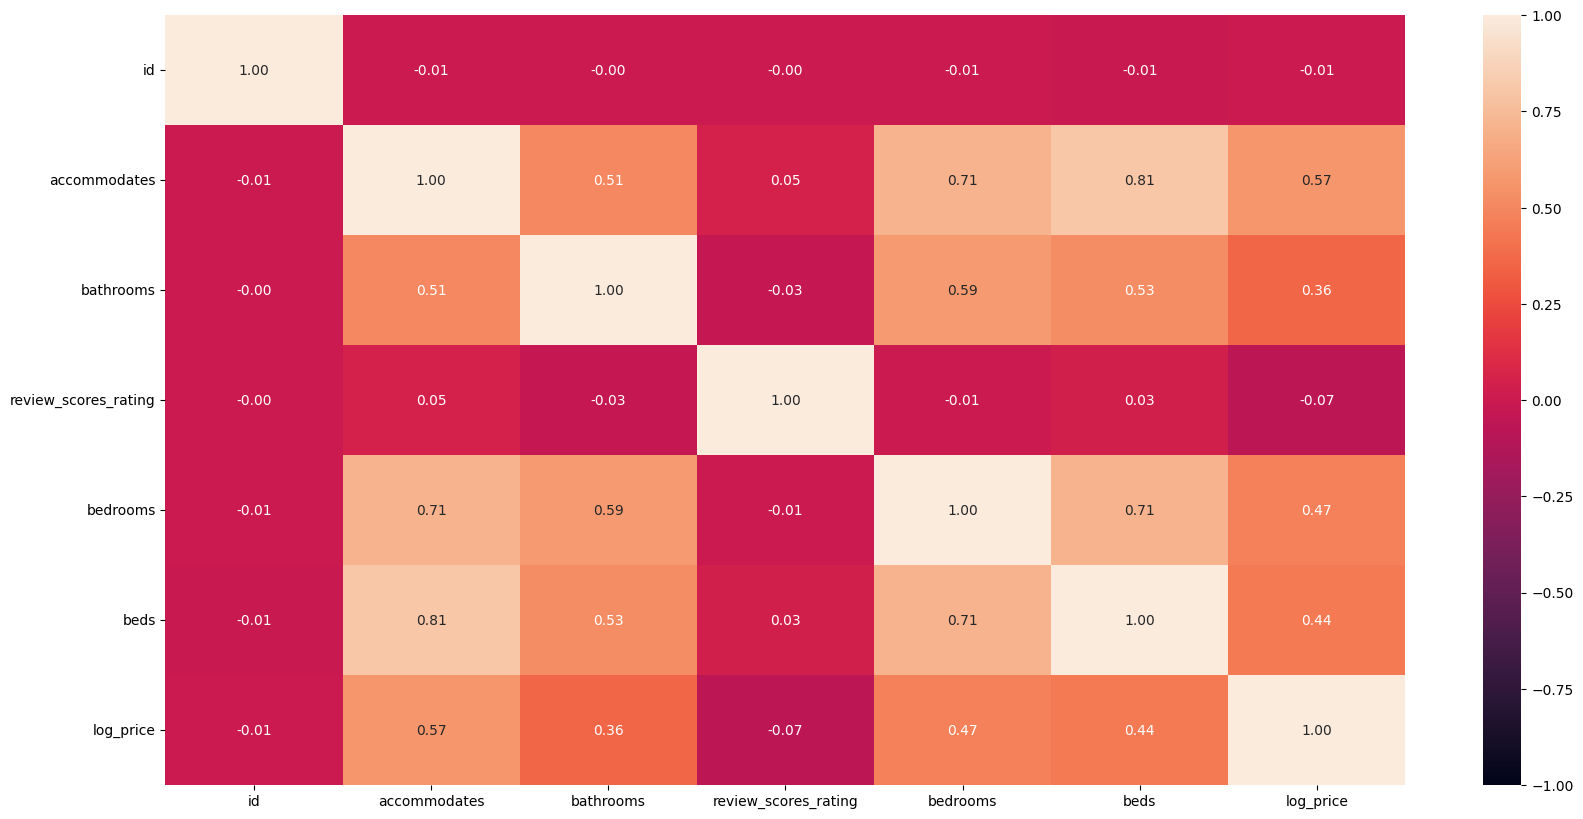

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

In [ ]:
df.corr(method ='pearson')

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
id,1.000000,-0.005755,-0.004058,-0.004263,-0.007578,-0.008876,-0.007178
accommodates,-0.005755,1.000000,0.505506,0.049729,0.709230,0.810231,0.567572
bathrooms,-0.004058,0.505506,1.000000,-0.025190,0.589783,0.525699,0.355174
review_scores_rating,-0.004263,0.049729,-0.025190,1.000000,-0.007647,0.034815,-0.066501
bedrooms,-0.007578,0.709230,0.589783,-0.007647,1.000000,0.709186,0.473028
beds,-0.008876,0.810231,0.525699,0.034815,0.709186,1.000000,0.441953
log_price,-0.007178,0.567572,0.355174,-0.066501,0.473028,0.441953,1.000000


The above plot and table shows the correlation between accomodants, beds and bedrooms

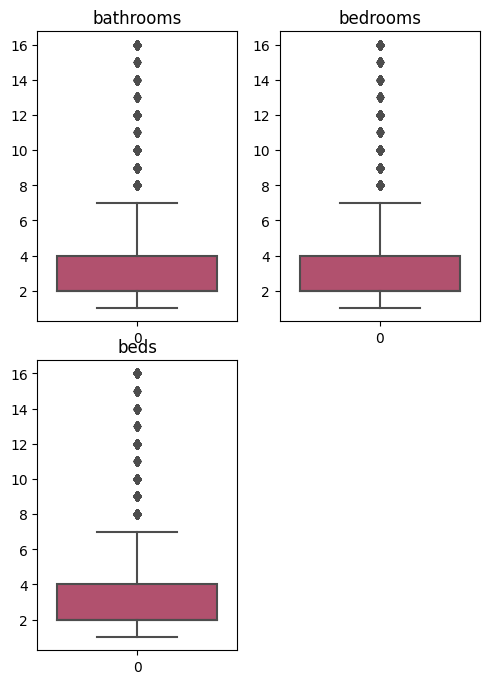

In [ ]:
cols = df[['bathrooms','bedrooms','beds']].columns.tolist()
plt.figure(figsize=(5,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["accommodates"],palette="flare")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='flare')
    tab1 = pd.crosstab(x,df['accommodates'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['accommodates'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

accommodates      1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  10.0  \
room_type                                                                     
Entire home/apt   737  12018  5808  10461  3205  4720  907  1739  262   663   
Private room     7551  19194  1879   1480   216   196   30    37    4    18   
Shared room      1144    643   106    124    22    52    9    19    4    20   
All              9432  31855  7793  12065  3443  4968  946  1795  270   701   

accommodates     11.0  12.0  13.0  14.0  15.0  16.0    All  
room_type                                                   
Entire home/apt    77   258    35    97    49   272  41308  
Private room        1     4     1     6     4    14  30635  
Shared room         1     2     0     1     1    15   2163  
All                79   264    36   104    54   301  74106  
------------------------------------------------------------------------------------------------------------------------


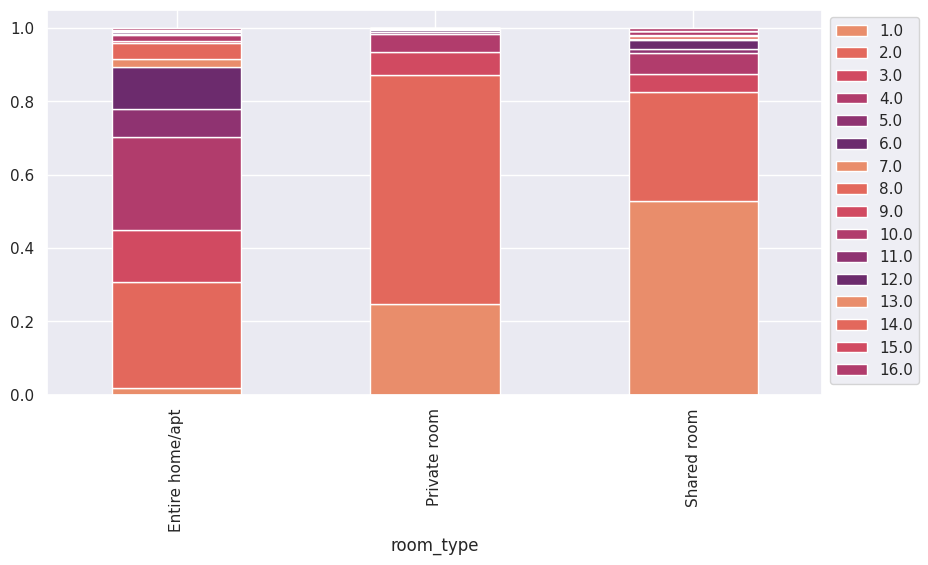

In [ ]:
stacked_plot(df['room_type'])


accommodates          1.0    2.0   3.0    4.0   5.0   6.0  7.0   8.0  9.0  \
cancellation_policy                                                         
flexible             4395  10950  2083   2940   658   905  138   262   33   
moderate             1967   8903  2211   3216   865  1102  195   345   50   
strict               3072  11996  3498   5910  1921  2961  613  1188  187   
All                  9434  31849  7792  12066  3444  4968  946  1795  270   

accommodates         10.0  11.0  12.0  13.0  14.0  15.0  16.0    All  
cancellation_policy                                                   
flexible               93     4    24     2    13     6    37  22543  
moderate               97     8    37     8    18     4    34  19060  
strict                511    67   203    26    73    44   230  32500  
All                   701    79   264    36   104    54   301  74103  
---------------------------------------------------------------------------------------------------------------

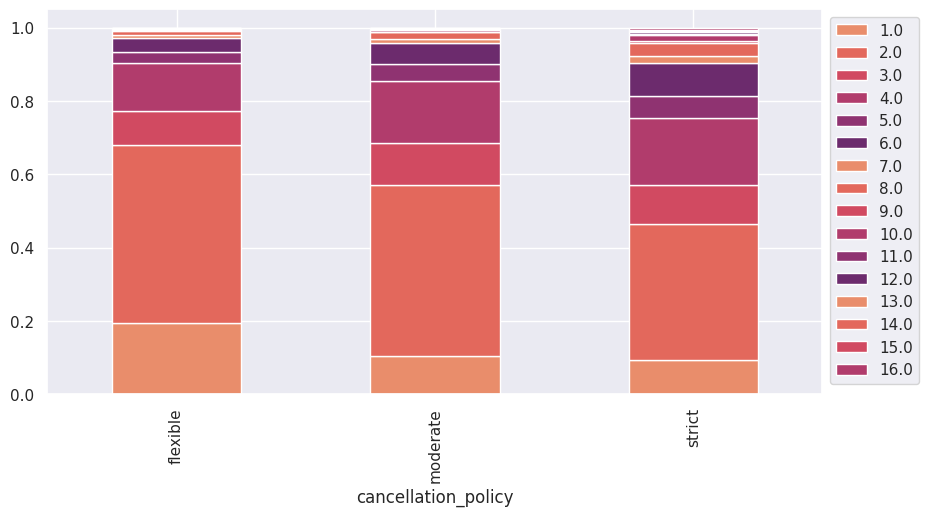

In [ ]:
stacked_plot(df['cancellation_policy'])


# Linear Model Building

In [ ]:
###Define dependent variable
ind_vars = df.drop(["accommodates", "log_price"], axis=1)
dep_var = df[["log_price"]]

print(ind_vars.head())
print(dep_var.head())

         id        room_type  bathrooms cancellation_policy cleaning_fee  \
0   6901257  Entire home/apt        1.0              strict         True   
1   6304928  Entire home/apt        1.0              strict         True   
2   7919400  Entire home/apt        1.0            moderate         True   
3  13418779  Entire home/apt        1.0            flexible         True   
4   3808709  Entire home/apt        1.0            moderate         True   

  instant_bookable  review_scores_rating  bedrooms  beds  
0                f                 100.0       1.0   1.0  
1                t                  93.0       3.0   3.0  
2                t                  92.0       1.0   3.0  
3                f                  20.0       2.0   2.0  
4                t                  40.0       0.0   1.0  
   log_price
0   5.010635
1   5.129899
2   4.976734
3   6.620073
4   4.744932


In [ ]:
###Defining dummy variables
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,id,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_t
0,6901257,1.0,100.0,1.0,1.0,0,0,0,1,1,0
1,6304928,1.0,93.0,3.0,3.0,0,0,0,1,1,1
2,7919400,1.0,92.0,1.0,3.0,0,0,1,0,1,1
3,13418779,1.0,20.0,2.0,2.0,0,0,0,0,1,0
4,3808709,1.0,40.0,0.0,1.0,0,0,1,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

print("No.of rows in train data =", x_train.shape[0])
print("No.of rows in train data =", x_test.shape[0])

No.of rows in train data = 51877
No.of rows in train data = 22234


In [ ]:
###Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
###Defining co-efficients and intercepts
coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=x_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
coef_df

,Coefficients
id,-1.857777e-10
bathrooms,1.633115e-01
review_scores_rating,-2.279401e-03
bedrooms,1.967399e-01
beds,2.015381e-02
room_type_Private room,-7.146322e-01
room_type_Shared room,-1.245649e+00
cancellation_policy_moderate,-5.298536e-03
cancellation_policy_strict,3.808682e-02
cleaning_fee_True,-3.253391e-02


In [ ]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = np.exp(model.predict(inp))
    y_act = np.exp(out.values)

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [ ]:
# Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

         RMSE        MAE       MAPE       R^2  Adjusted R^2
0  137.418412  64.229826  40.608452  0.338273      0.338133


In [ ]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, x_test, y_test))

Test Performance

         RMSE        MAE       MAPE       R^2  Adjusted R^2
0  135.935236  63.866053  40.311925  0.343412      0.343087


In [ ]:
####As our MEA has a high score means we have bad proformance on our model

####-Since we have less samples it is harder to reconstruct the error distribution using RMSE which is the reason it is so high in our case.

####-Our R^2 is low and that is because our dataset or the data points are distributed with low variance and should be closer to 1

####-Adjusted R-squared is low becuse we dont have many features and by that i mean the effective features to train our model.

####-I do think we need more features and better treatment of the ouliers to improve our score.

0.05
0.132


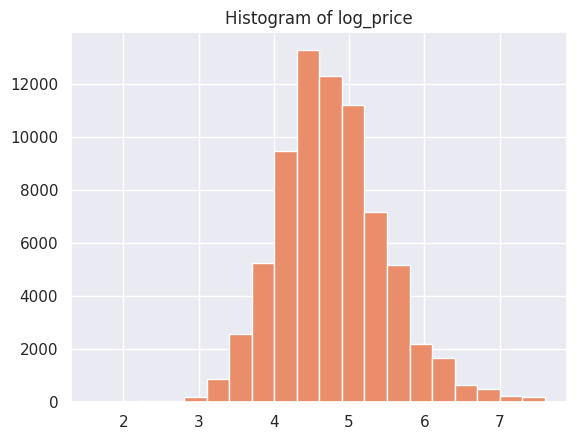

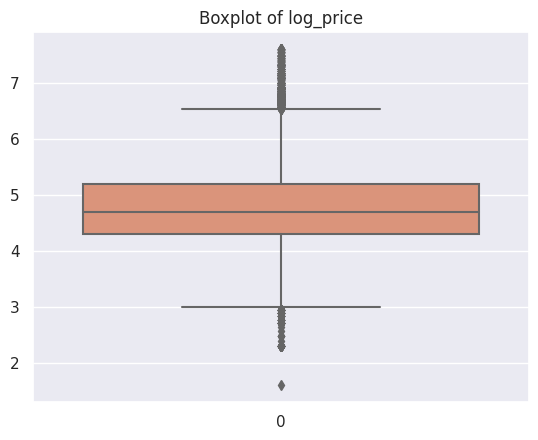

In [ ]:
##Outlier Detection
##treatment for log_price
np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)

def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

plt.hist(df['log_price'], 20)
plt.title('Histogram of log_price')
plt.show()

sns.boxplot(df['log_price'])
plt.title('Boxplot of log_price')
plt.show()

In [ ]:
quartiles = np.quantile(df['log_price'][df['log_price'].notnull()], [.25, .75])
log_price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {log_price_4iqr}')
outlier_log_price = df.loc[np.abs(df['log_price'] - df['log_price'].median()) > log_price_4iqr, 'log_price']
outlier_log_price
df.drop(outlier_log_price.index, axis=0, inplace=True)

Q1 = 4.304065093, Q3 = 5.192956851, 4*IQR = 3.555567031999999


0.05
0.132


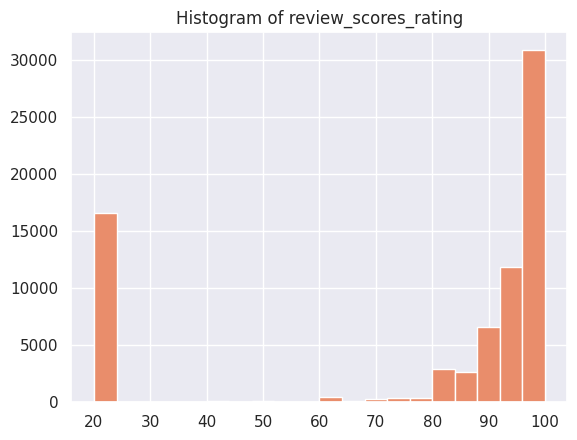

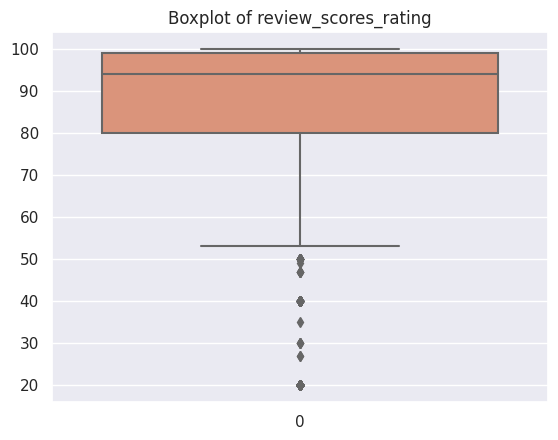

In [ ]:
###Treatment for review_scores_rating
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

plt.hist(df['review_scores_rating'], 20)
plt.title('Histogram of review_scores_rating')
plt.show()

sns.boxplot(df['review_scores_rating'])
plt.title('Boxplot of review_scores_rating')
plt.show()

In [ ]:
quartiles = np.quantile(df['review_scores_rating'][df['review_scores_rating'].notnull()], [.25, .75])
review_scores_rating_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {review_scores_rating_4iqr}')
outlier_review_scores_rating = df.loc[np.abs(df['review_scores_rating'] - df['review_scores_rating'].median()) > review_scores_rating_4iqr, 'review_scores_rating']
outlier_review_scores_rating
df.drop(outlier_review_scores_rating.index, axis=0, inplace=True)

Q1 = 80.0, Q3 = 99.0, 4*IQR = 76.0


0.05
0.132


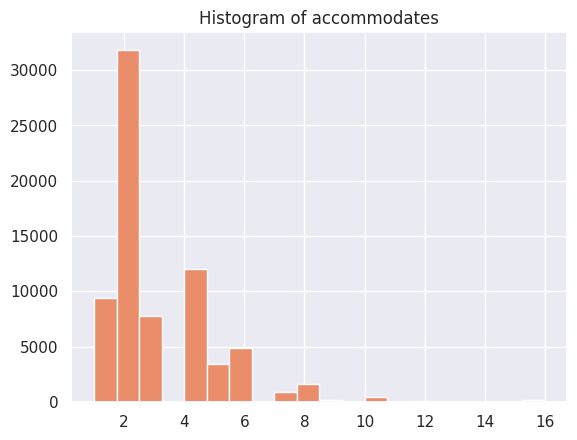

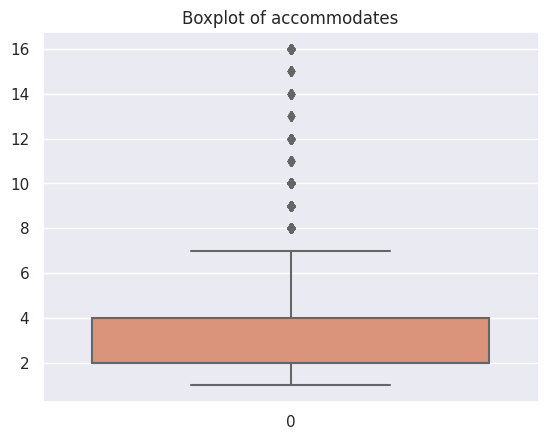

In [ ]:
##Treatment for accommodates
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)

print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

plt.hist(df['accommodates'], 20)
plt.title('Histogram of accommodates')
plt.show()

sns.boxplot(df['accommodates'])
plt.title('Boxplot of accommodates')
plt.show()

In [ ]:
quartiles = np.quantile(df['accommodates'][df['accommodates'].notnull()], [.25, .75])
accommodates_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {accommodates_4iqr}')
outlier_accommodates = df.loc[np.abs(df['accommodates'] - df['accommodates'].median()) > accommodates_4iqr, 'accommodates']
outlier_accommodates

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


306      16.0
457      16.0
482      11.0
569      16.0
642      12.0
         ... 
73669    12.0
73695    12.0
73957    14.0
73980    15.0
74081    16.0
Name: accommodates, Length: 838, dtype: float64

0.05
0.132


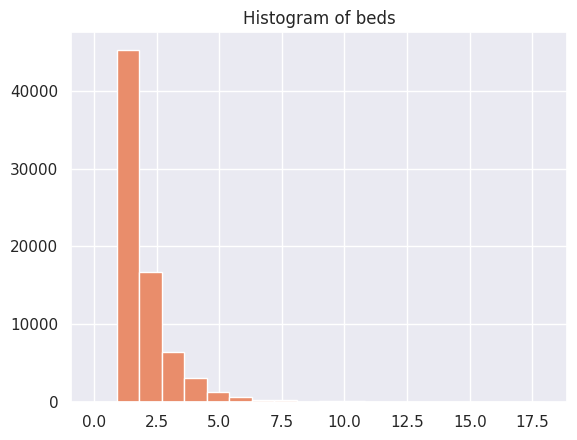

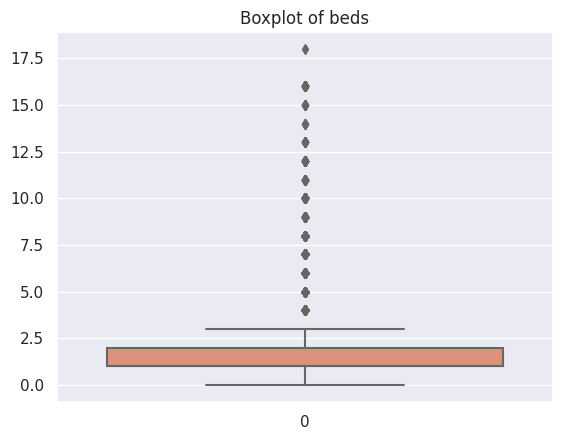

In [ ]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)
print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

plt.hist(df['beds'], 20)
plt.title('Histogram of beds')
plt.show()
sns.boxplot(df['beds'])
plt.title('Boxplot of beds')
plt.show()

In [ ]:

quartiles = np.quantile(df['beds'][df['beds'].notnull()], [.25, .75])
beds_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {beds_4iqr}')
outlier_beds = df.loc[np.abs(df['beds'] - df['beds'].median()) > beds_4iqr, 'beds']
outlier_beds
df.drop(outlier_beds.index, axis=0, inplace=True)

Q1 = 1.0, Q3 = 2.0, 4*IQR = 4.0


<Axes: >

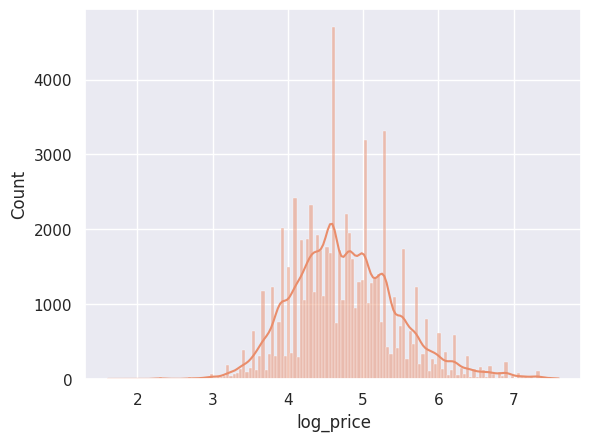

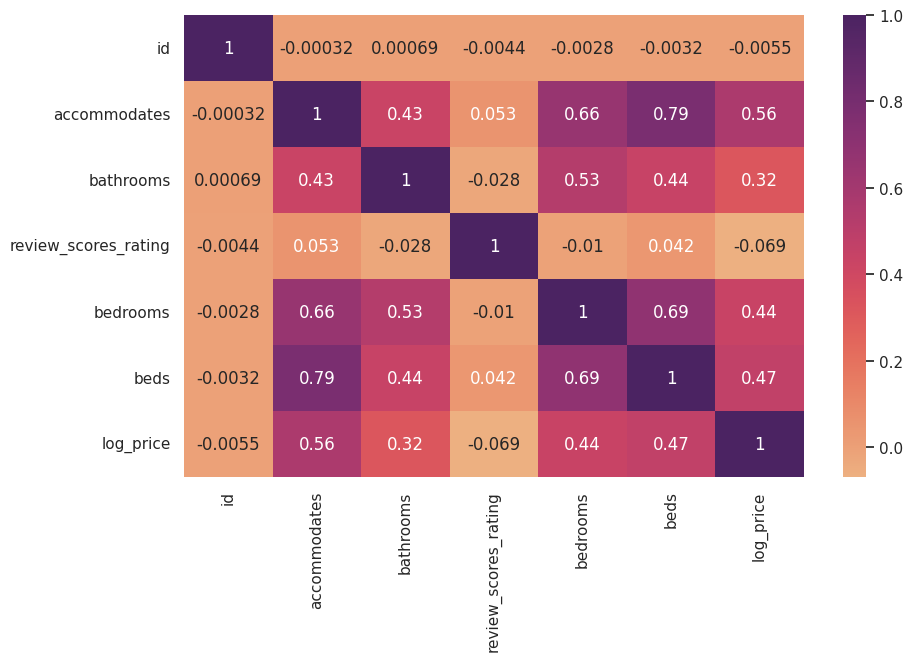

In [ ]:
sns.histplot(df["log_price"], kde=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="flare")

### ***Conclusion:***

*   With our linear regression model we have been able to capture ~32% variation in our data.

*   The more bedrooms and beds the rental has the higher the price.

*   If it is instant bookable the higher the price
*   If the rental has bad reviews then lower the rental price.




---



---


  
                                                                 UMAIMA ALI


---



---


